In [1]:
from ptiming_ana import *
from lstchain.io.io import dl2_params_lstcam_key,dl2_params_src_dep_lstcam_key
from astropy.io import fits
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Image
import numpy as np

# Creating the PulsarAnalysis object and settings

In [2]:
h=PulsarAnalysis()

In [3]:
h.setBackgroundLimits([0.52,0.87])
h.setPeaklimits(P1_limits=[0,0.026,0.983,1],P2_limits=[0.377,0.422],P3_limits=None)

In [4]:
h.setBinning(50,xmin=0,xmax=1)

In [5]:
h.setTimeInterval(tint=3600*24)

In [6]:
h.setFittingParams(model='lorentzian',binned=False)

In [7]:
h.setEnergybinning(np.logspace(np.log10(0.1),np.log10(10), 4))

# Extracting phases, times and energies from file and give them to the object

#### For Fermi data there is a class to read these lists and use them in the main object.

In [8]:
h.setFermiInputFile('./example_data/merged2_pulsar.fits')

#### But in general we can read our file (FITS, DL2, DL3...) and extract phases, times and energies as lists and read them as follows:

In [9]:
f=fits.open('./example_data/merged2_pulsar.fits')
fits_table=f[1].data

In [10]:
times=np.sort(fits_table['BARYCENTRIC_TIME'].byteswap().newbyteorder())
phases=fits_table['PULSE_PHASE'].byteswap().newbyteorder()
energies=fits_table['ENERGY'].byteswap().newbyteorder()

In [11]:
h.setListsInput(phases[0:1000],times[0:1000],energies[0:1000]/1000,tel='fermi',energy_units='TeV')

# Run the code

In [12]:
h.run()

Initializing...
Calculating statistics...
Fitting the data to the set model...
[0.0017601531556937246, 0.001779124681411507, 0.006582421565928307, 0.00494231994568806, 4.0940305254273515, 1.2117985095771058, 0.8024124735049485]

Performing energy-dependent analysis...
Creating object in energy range (TeV):0.10-0.46
Calculating statistics...
Fitting the data to the set model...
[0.0025243754758113913, 0.0022551500854067694, 0.009931807742651049, 0.007015874246531752, 4.733218703841582, 1.6398107936944262, 0.9823583987629485]
Creating object in energy range (TeV):0.46-2.15
Calculating statistics...
Fitting the data to the set model...
[0.0030736287890099257, 0.003151648594052148, 0.01330241585264131, 0.008004163103616896, 6.304388461365515, 1.7292667052935267, 1.2735108931171542]
Creating object in energy range (TeV):2.15-10.00
Calculating statistics...
Fitting the data to the set model...
[0.003020766129733569, 0.0026898209033601587, 0.03260502206170685, 0.038208009971070114, 20938414.6

# Show the results

## Overall results

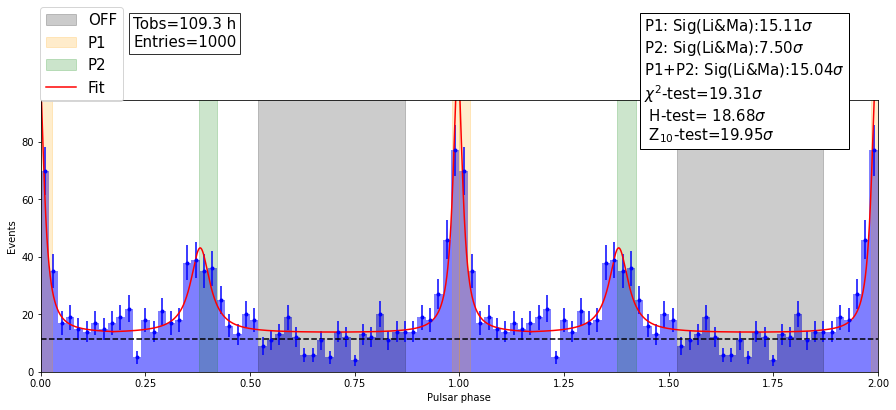

In [13]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

In [43]:
results=h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                      P1          P2       P1+P2
Significance   24.796944   12.031564   24.485595
Nex           295.402857  116.328571  411.731429
Nex_error      18.587067   13.000024   22.933546
Number        340.000000  163.000000  503.000000
noff           44.597143   46.671429   91.268571
sign_t_ratio    0.814657    0.395275    0.804429
s/n ratio      44.234505   17.027890   43.097630

P1/P2 ratio=2.54+/-0.33


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test        Zn_test         H_test
Statistic              1.438650e+03   1.389887e+03   1.413835e+03
p-value               4.497061e-269  1.633990e-282  4.166413e-245
Number of $\sigma$     3.548299e+01   3.589812e+01   3.341489e+01


## Result of the fitting

In [44]:
h.fit_model

'lorentzian'

In [45]:
fit_result=h.show_fit_results()

      Name     Value     Error
0     mu_1  0.994169  0.001065
1  gamma_1  0.013783  0.001083
2     mu_2  0.376253  0.003791
3  gamma_2  0.028837  0.003337
4        A  1.963845  3.898130
5        B  0.827853  1.643637
6        C  0.516697  1.026776


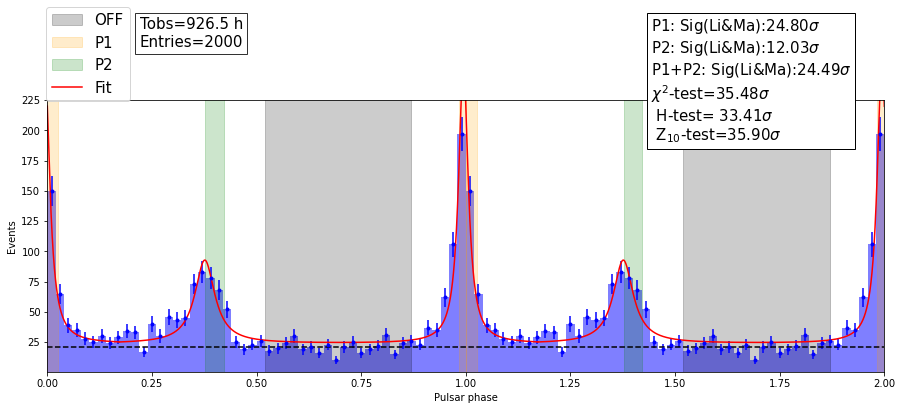

In [46]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

## Results vs Time

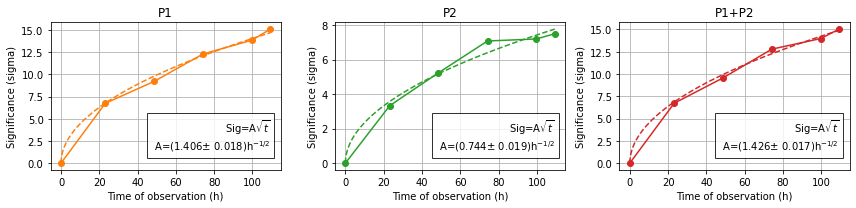

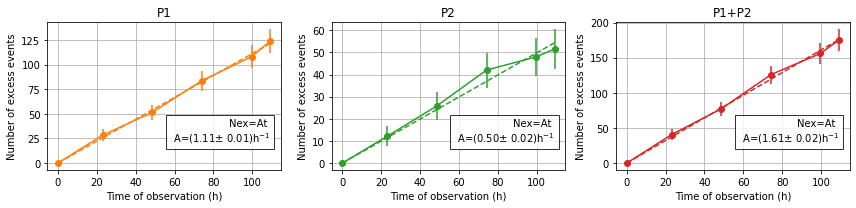

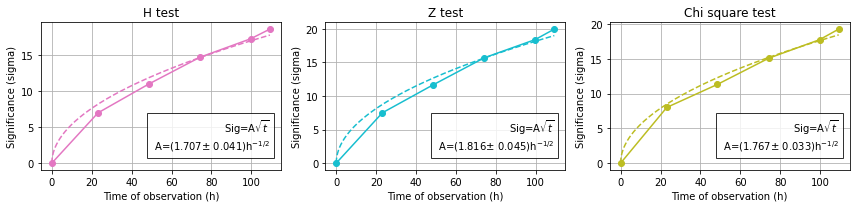

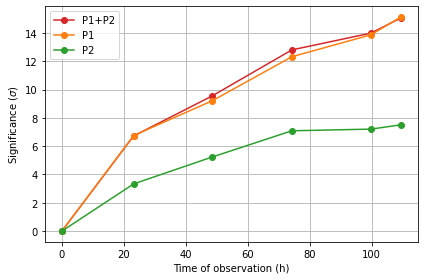

In [14]:
TimeEv=h.show_timeEvolution()

## Results vs Energy

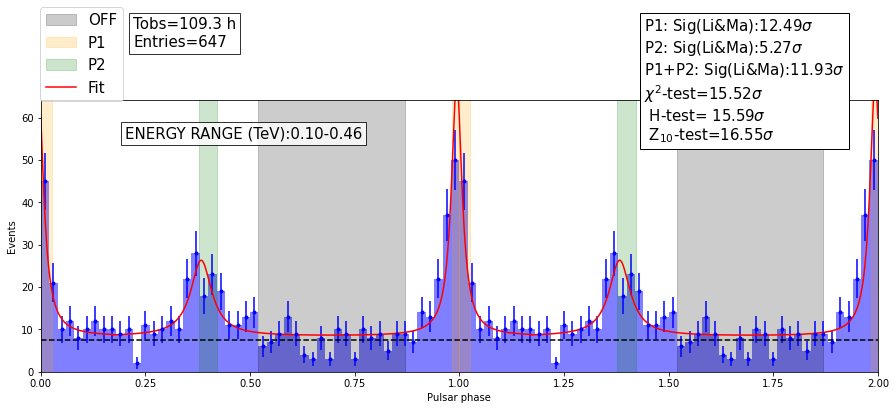

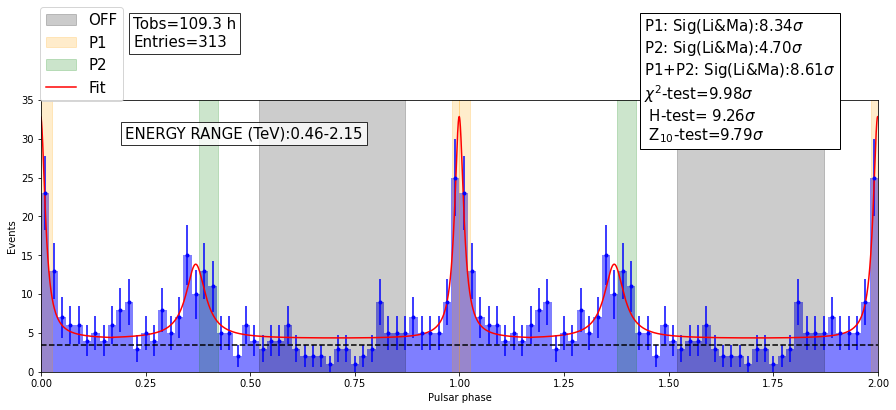

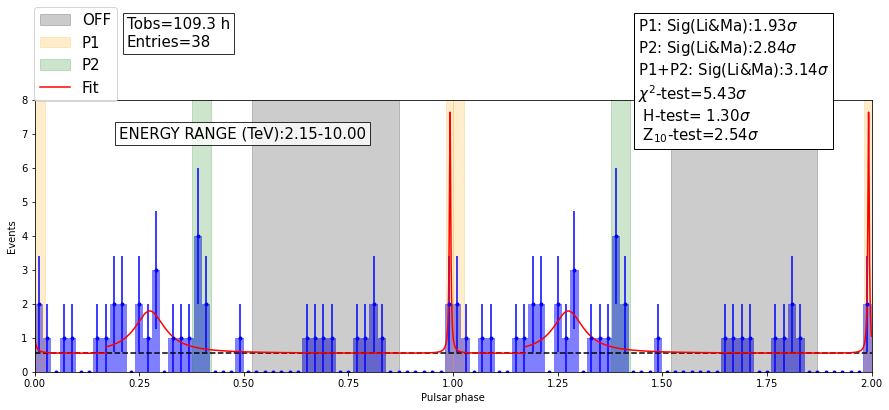

[<Figure size 1080x360 with 1 Axes>,
 <Figure size 1080x360 with 1 Axes>,
 <Figure size 1080x360 with 1 Axes>]

In [15]:
h.show_lcVsEnergy()

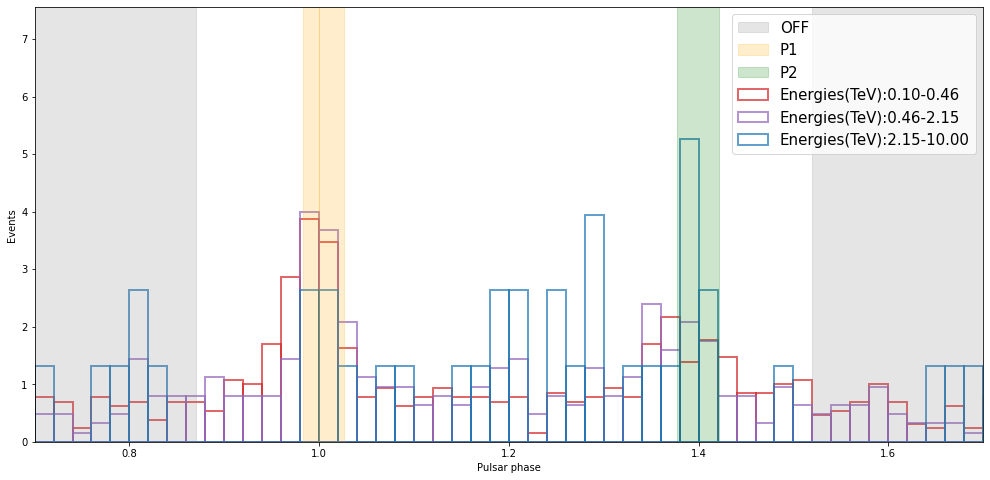

In [16]:
energy_lc=h.show_all_lc(ylimits=None)

In [17]:
energy_results=h.show_EnergyPresults()

ENERGY RANGE (TeV):0.10-0.46

RESULTS FOR THE PEAK STATISTICS:

                     P1         P2       P1+P2
Significance  12.485052   5.271228   11.934739
Nex           83.151429  28.414286  111.565714
Nex_error     10.047244   6.865308   12.335109
Number        99.000000  45.000000  144.000000
noff          15.848571  16.585714   32.434286
sign_t_ratio   1.194901   0.504491    1.142233
s/n ratio     20.886932   6.977015   19.589736

P1/P2 ratio=2.93+/-0.79


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test       Zn_test        H_test
Statistic              3.530773e+02  3.487125e+02  3.144471e+02
p-value                1.236656e-47  8.205210e-62  4.446981e-55
Number of $\sigma$     1.552172e+01  1.654851e+01  1.558721e+01

 

-------------------------------------------------------------------
ENERGY RANGE (TeV):0.46-2.15

RESULTS FOR THE PEAK STATISTICS:

                     P1         P2      P1+P2
Significance   8.344419   4.697292   8.609747
Nex       

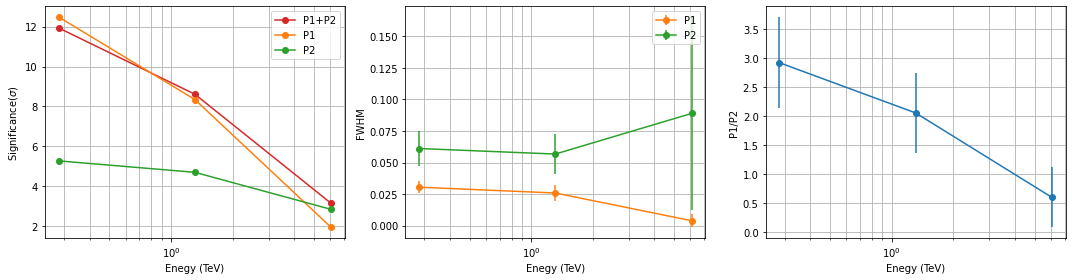

In [18]:
energy_plots=h.show_EnergyAna()

## Fit vs Energy

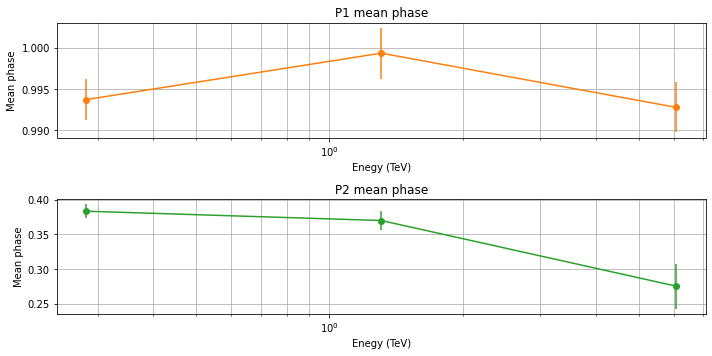

In [19]:
mean_energy_plot=h.show_meanVsEnergy()

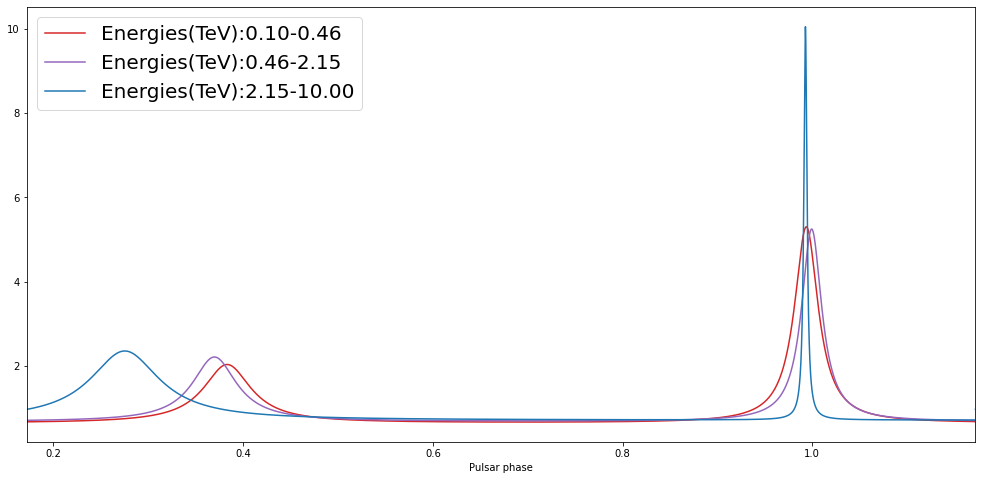

In [20]:
allfits_plot=h.show_all_fits()